In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable

class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.sigmoid(out)
        out =self.predict(out)

        return out

net = Net(1,20,1)
print(net)
optimizer = torch.optim.SGD(net.parameters(),lr = 0.1)
loss_func = torch.nn.MSELoss()

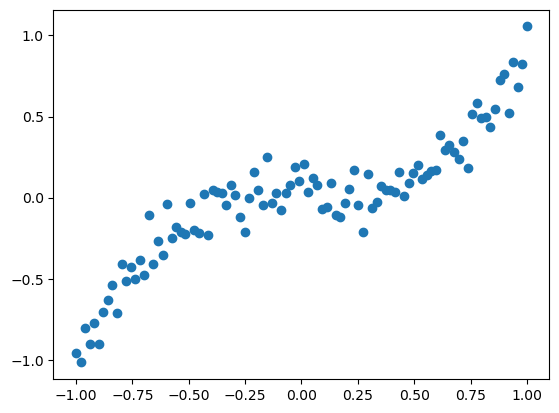

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(3)+0.1*torch.randn(x.size())
x , y =(Variable(x),Variable(y))

plt.scatter(x.data,y.data)
plt.show()

In [ ]:
for t in range(5000):
    prediction = net(x)
    loss = loss_func(prediction,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #if t%500 ==0:
    #    plt.cla()
    #    plt.scatter(x.data.numpy(), y.data.numpy())
    #    plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
    #    plt.text(0.5, 0, 'Loss = %.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
    #    plt.pause(0.05)

for parameters in net.parameters():
    print(parameters)